In [40]:
library('ggplot2')
library('reshape2')
library('ggpubr')
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(Hmisc)
library(gridExtra)
library("survminer")
library(dplyr)

source("../../../src/tools.R")
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250) # set the maximum number of columns displayed

# COMPARISON MODELS WITH AND WITHOUT FEATURE SELECTION

In [41]:
SVM <- read.table("../InitialPrognosis/final_prognosis/SVM_comp.csv",sep=',',header=T)
SVM_reduced <- read.table("../InitialPrognosis/comparison_dataframes/SVM_comp_reduced.csv",sep=',',header=T)

myplots <- list() 
i <- 1
for (l in list.files('../InitialPrognosis/comparison_dataframes/')){
    if (grepl("_reduced.tsv",l)){
        df <- NULL
        tmp1 <- cbind(read.table(paste('../InitialPrognosis/comparison_dataframes/',l,sep="")),SVM_optimized=SVM_reduced[,sub("_reduced.tsv","",l)])
        tmp1$feature <- "reduced"
        tmp1$model <- sub("_reduced.tsv","",l)
        tmp2 <- cbind(read.table(paste("../InitialPrognosis/final_prognosis/",sub("_reduced","",l),sep=""))[,colnames(read.table(paste('../InitialPrognosis/comparison_dataframes/',l,sep="")))],SVM_optimized=SVM[,sub("_reduced.tsv","",l)])
        tmp2$feature <- "full"
        tmp2$model <- sub("_reduced.tsv","",l)
        df <- rbind(tmp1,tmp2)
        df <- melt(df,id=c('model','feature'))
        myplots[[i]] <- ggplot(df,aes(x=variable,y=value)) + geom_boxplot(aes(fill = feature), notch=F) + theme(strip.text = element_text(size=35),legend.position="top",axis.text.x = element_text(size=20,angle = 35, hjust = 0.8,vjust=0.8),
              axis.text.y = element_text(size=20),axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
        ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ model, ncol=2) 
        i <- i+1
    }
}
#c(1,2,8,10,11,12,20,23,25,26,30,32,35,36,37,38,39,40,41,43)
set_notebook_plot_size(70,90)
#grid.arrange(grobs=myplots[c(1,2,8,10,19,26,30,32,36,37)],nrow=5,ncol2)
grid.arrange(grobs=myplots,nrow=11,ncol=4)

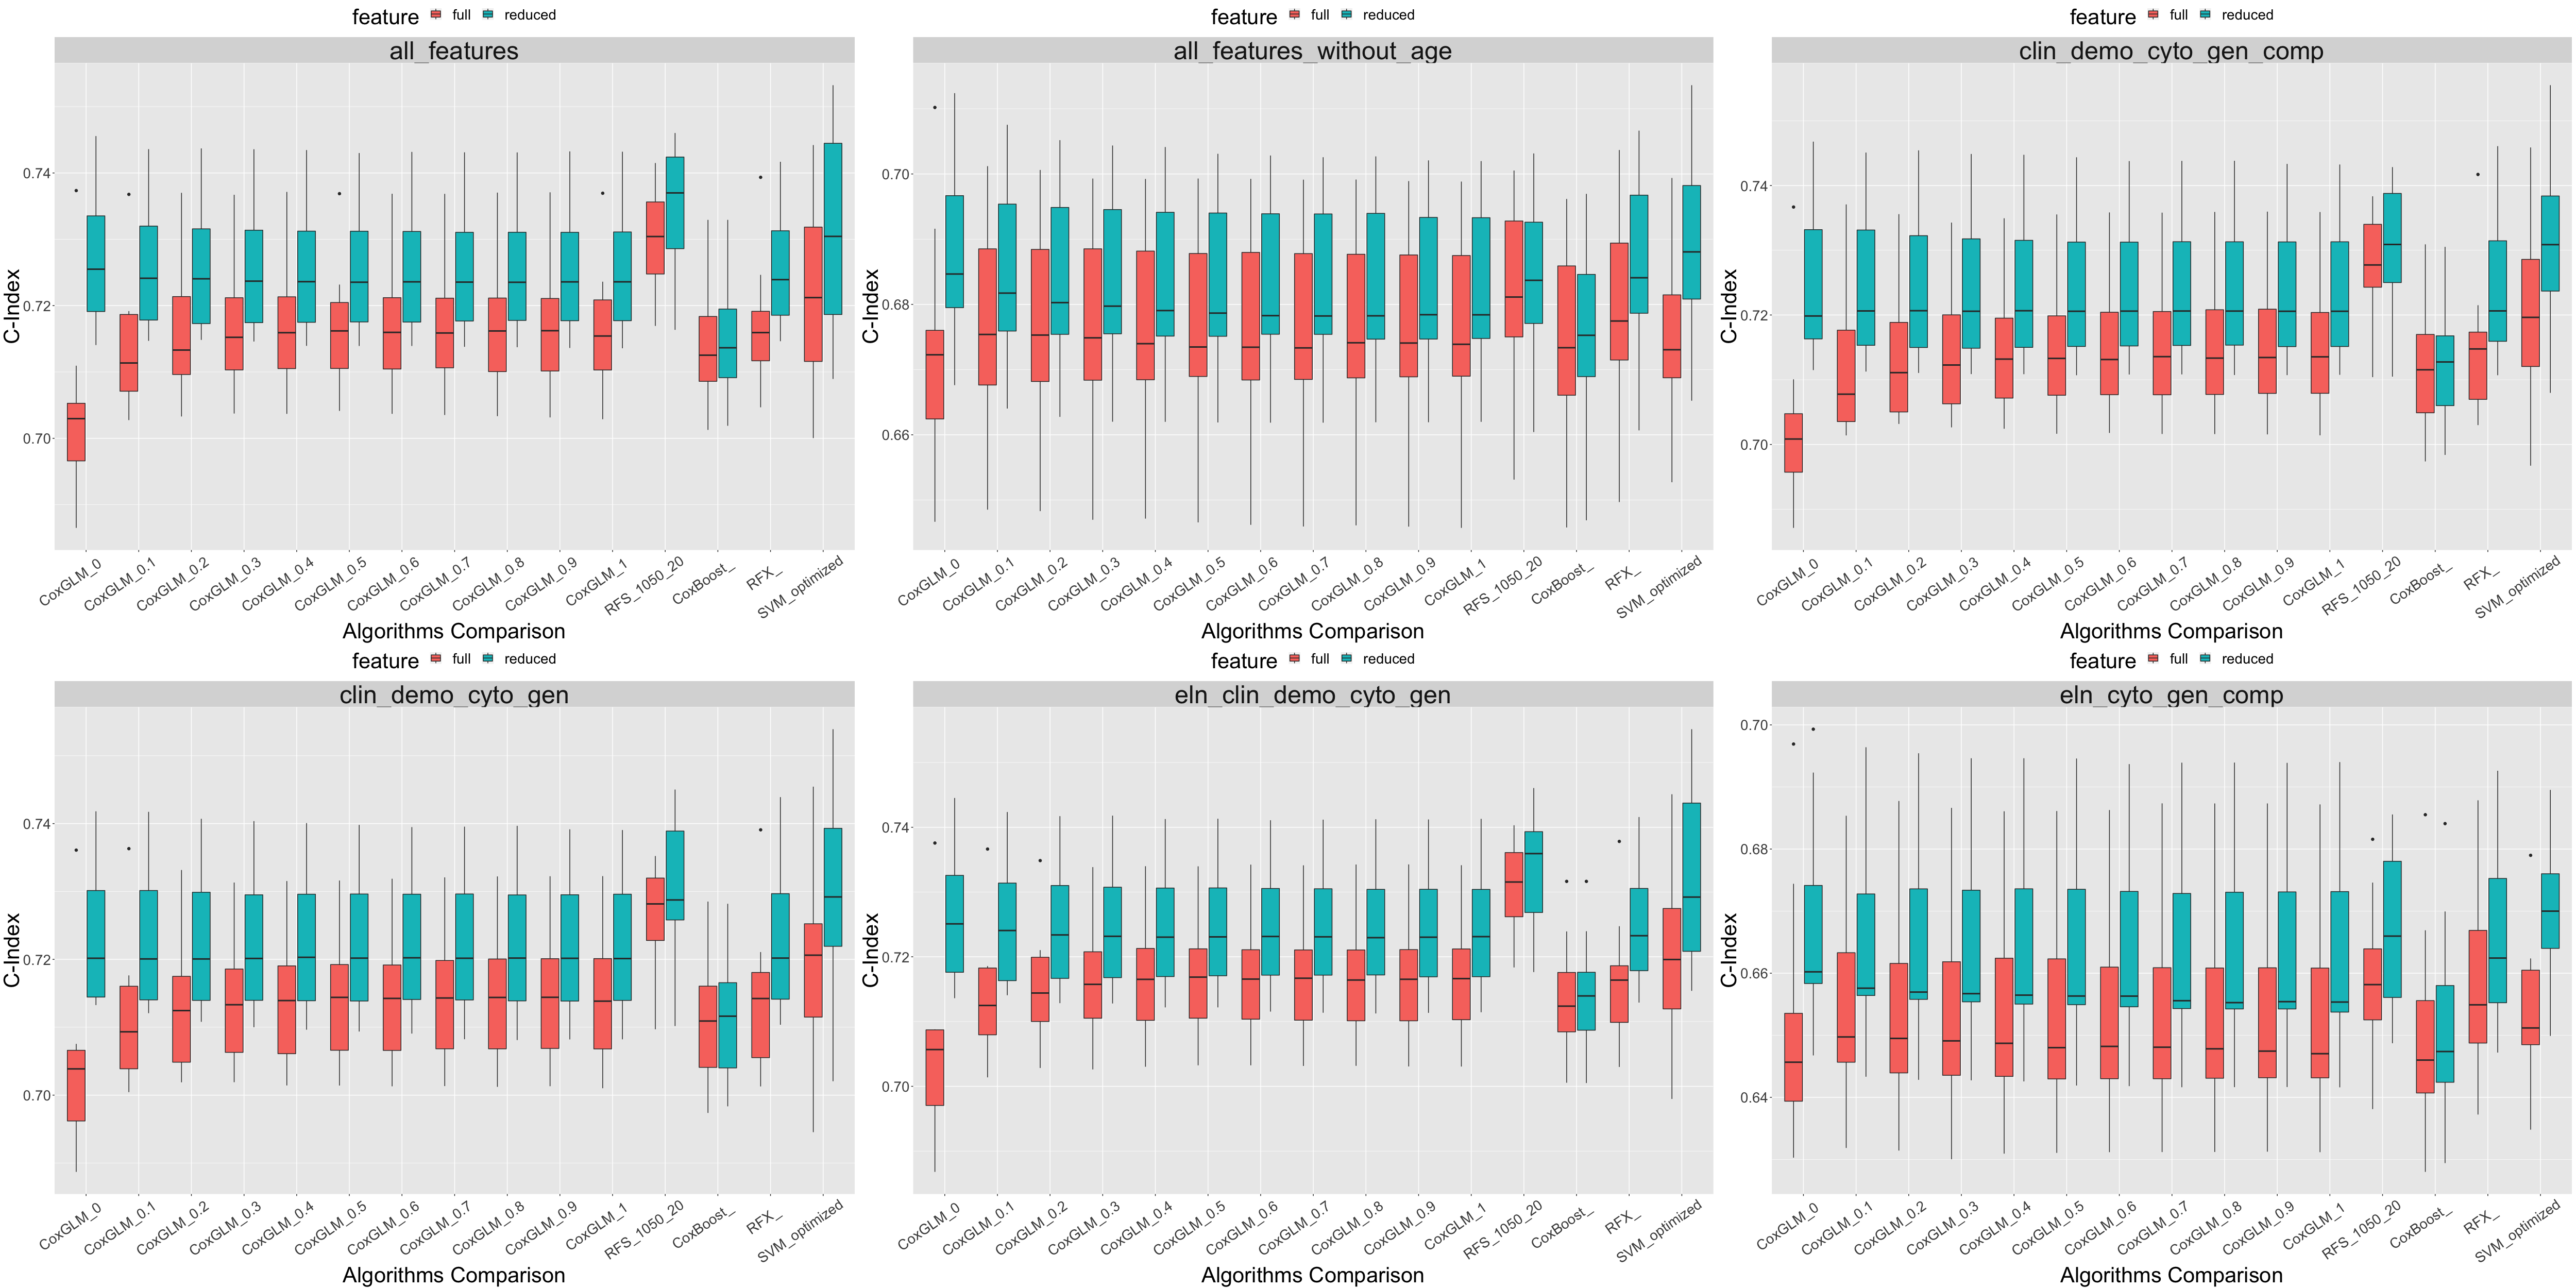

In [38]:
SVM <- read.table("../InitialPrognosis/final_prognosis/SVM_comp.csv",sep=',',header=T)
SVM_reduced <- read.table("../InitialPrognosis/comparison_dataframes/SVM_comp_reduced.csv",sep=',',header=T)

myplots <- list() 
i <- 1
for (l in list.files('../InitialPrognosis/comparison_dataframes/')){
    if (grepl("_reduced.tsv",l)){
        df <- NULL
        tmp1 <- cbind(read.table(paste('../InitialPrognosis/comparison_dataframes/',l,sep="")),SVM_optimized=SVM_reduced[,sub("_reduced.tsv","",l)])
        tmp1$feature <- "reduced"
        tmp1$model <- sub("_reduced.tsv","",l)
        tmp2 <- cbind(read.table(paste("../InitialPrognosis/final_prognosis/",sub("_reduced","",l),sep=""))[,colnames(read.table(paste('../InitialPrognosis/comparison_dataframes/',l,sep="")))],SVM_optimized=SVM[,sub("_reduced.tsv","",l)])
        tmp2$feature <- "full"
        tmp2$model <- sub("_reduced.tsv","",l)
        df <- rbind(tmp1,tmp2)
        df <- melt(df,id=c('model','feature'))
        myplots[[i]] <- ggplot(df,aes(x=variable,y=value)) + geom_boxplot(aes(fill = feature), notch=F) +
        theme(strip.text = element_text(size=35),legend.position="top",axis.text.x = element_text(size=20,angle = 35, hjust = 0.8,vjust=0.8),
              axis.text.y = element_text(size=20),axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=20)) +
        ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ model, ncol=2) 
        i <- i+1
    }
}
#c(1,2,8,10,11,12,20,23,25,26,30,32,35,36,37,38,39,40,41,43)
set_notebook_plot_size(50,25)
grid.arrange(grobs=myplots[c(1,2,8,10,30,36)],nrow=2,ncol=3,gp=gpar(fontsize=22),element_text(size = 56))
